In [ ]:
# Import essential libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import re  
from nltk.corpus import stopwords  
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score  
import pickle  


In [50]:
# Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Display a sample of 5 random rows from the dataframe
df.sample(5)


,Category,Resume
293,Health and fitness,Education Details \r\nJanuary 2009 P.G. Sports...
940,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
639,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...
757,Hadoop,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo..."
478,Automation Testing,"Technical Skills Summary I have completed ""COR..."


In [51]:
df.shape

(962, 2)

In [52]:
# Get the count of unique values in the "Category" column
df["Category"].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

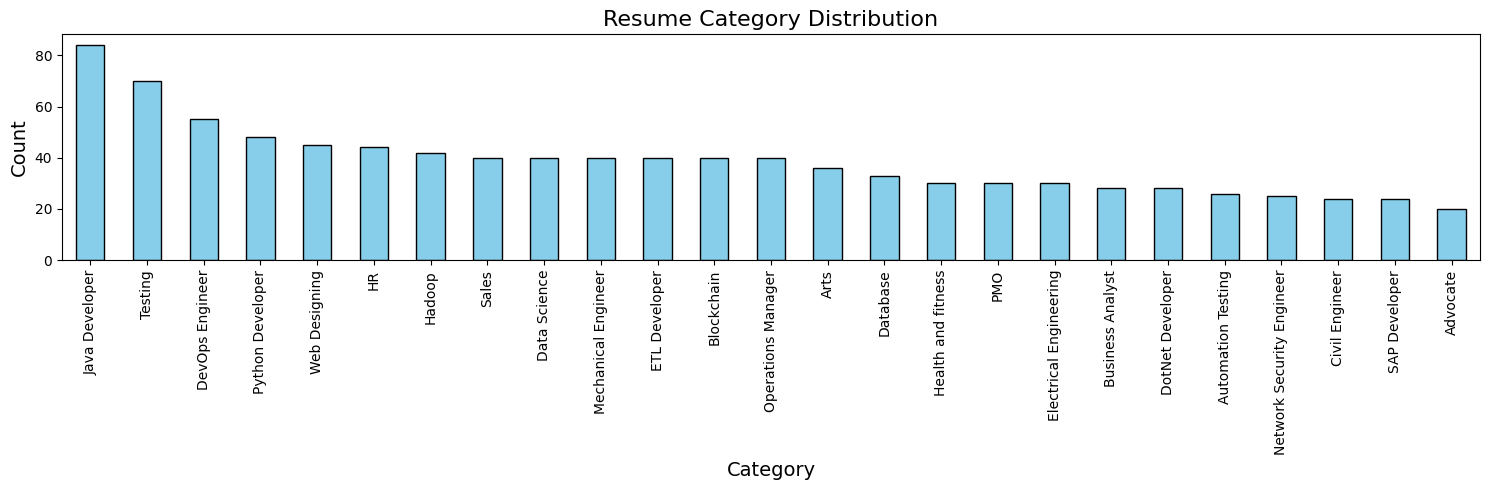

In [53]:
# Set the size of the plot
plt.figure(figsize=(15, 5))

# Count the number of resumes in each category and plot a bar chart
category_counts = df["Category"].value_counts()
category_counts.plot(kind="bar", color='skyblue', edgecolor='black')

# Customize plot labels and title
plt.title("Resume Category Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


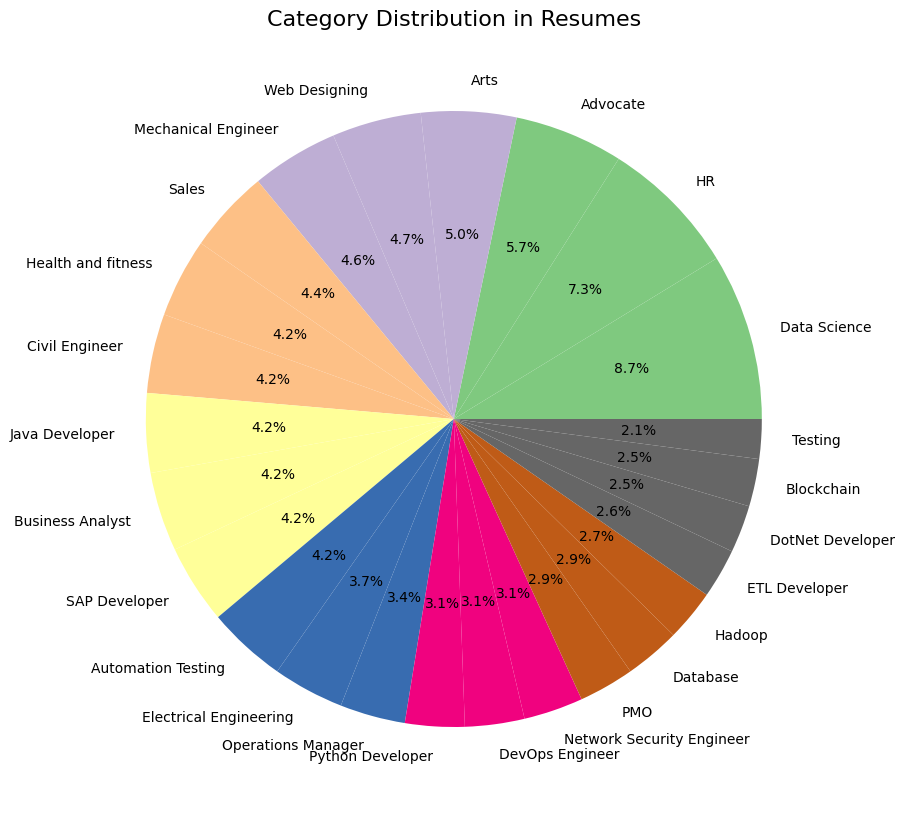

In [56]:
# Get the value counts and unique categories
counts = df["Category"].value_counts()
labels = df["Category"].unique()

# Create a pie chart with customized settings
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0, 1, len(labels))))

# Display the plot
plt.title("Category Distribution in Resumes", fontsize=16)
plt.show()


In [ ]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.
    
    :param text: The string to be cleaned
    :return: The cleaned string
    """

    # Compile patterns for URLs and emails to optimize the cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    # Remove URLs and emails
    text = url_pattern.sub('', text)
    text = email_pattern.sub('', text)
    
    # Remove special characters, leaving only words and whitespace
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords by filtering out unwanted words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    
    return text

In [57]:
string = "Visit our website at http://www.testsite.com for more info! Contact support@website.com for queries. #Special #Offers"
print(clean(string))


Visit website info Contact queries Special Offers


In [58]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [59]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [60]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [41]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [42]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [61]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit the TF-IDF vectorizer on the 'Resume' column to learn the vocabulary and IDF of the words
tfidf.fit(df["Resume"])

# Transform the 'Resume' texts into a sparse matrix of TF-IDF features
resume = tfidf.transform(df["Resume"])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [63]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [64]:
X_train.shape, y_train.shape

((769, 8017), (769,))

Accuracy of the KNN classifier on test set: 0.98
Precision:  0.9874064478986759
Recall:  0.9844559585492227
F1-Score:  0.9838850508539628

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1

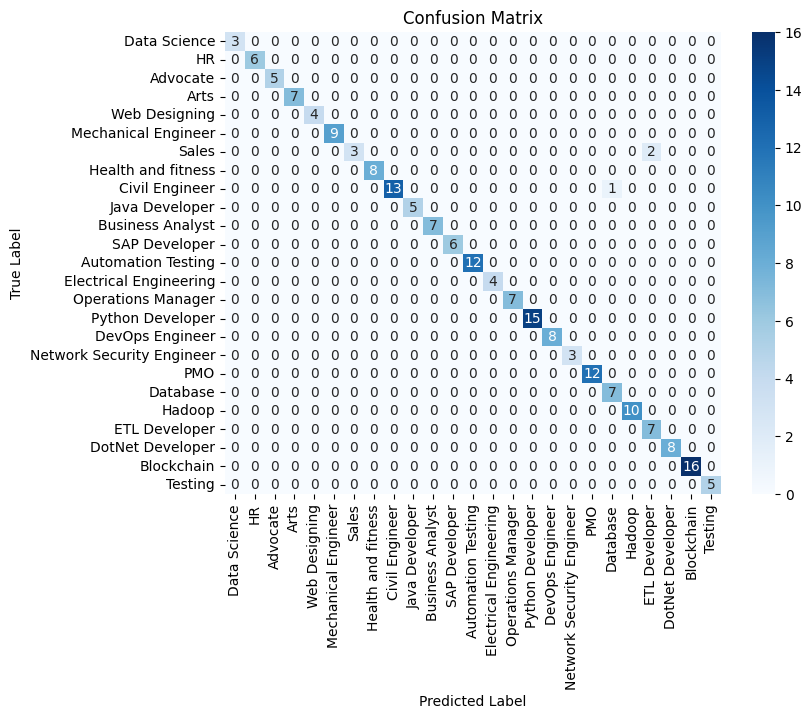

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

# Print additional classification metrics
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))

# Print detailed classification report (precision, recall, F1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [69]:
data_to_save = {
    'model': clf,
    'tfidf_vectorizer': tfidf
}

with open('model_and_tfidf (1).pkl', 'wb') as file:
    pickle.dump(data_to_save, file)